# Time Series Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
time_series_df = pd.read_csv('../Dataset/New_Data/7_price_filtered.csv', low_memory=False)

In [3]:
time_series_df['posted_date'] = pd.to_datetime(time_series_df['posted_date'])
df = time_series_df.sort_values(by='posted_date')

data = df[['posted_date', 'main_city', 'price_land_pp']]


C:\Users\User\AppData\Local\Temp\ipykernel_92468\196603121.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['posted_date'] = pd.to_datetime(data['posted_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_92468\196603121.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['posted_date'].dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_92468\196603121.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


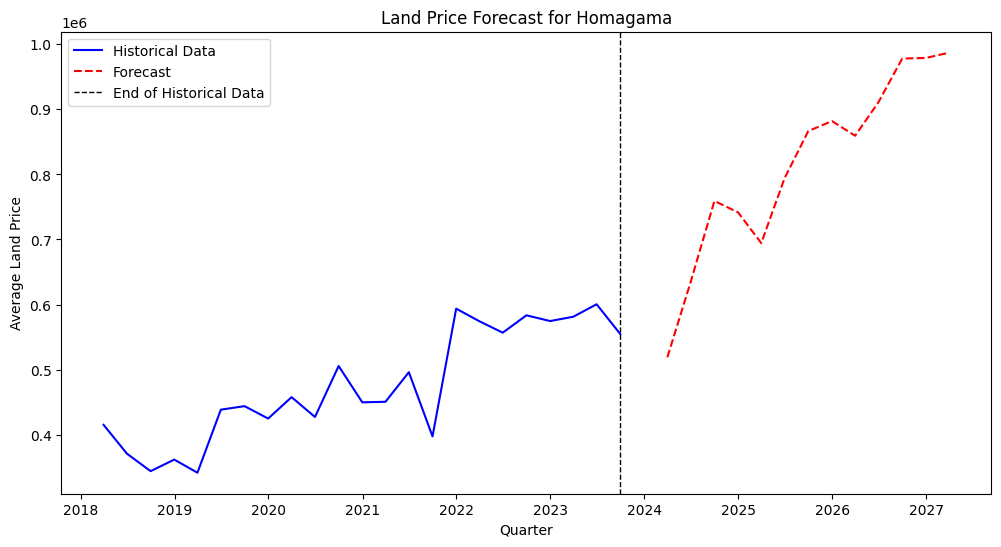

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

data['posted_date'] = pd.to_datetime(data['posted_date'])

data['year'] = data['posted_date'].dt.year
data['quarter'] = data['posted_date'].dt.quarter

train_data = data[data['posted_date'] < '2023-09-01']

prediction_period = pd.date_range(start='2024-01-01', end='2026-12-31', freq='Q')
prediction_data = pd.DataFrame({'posted_date': prediction_period, 'quarter': prediction_period.quarter})

user_city = input("Enter the main_city: ")

city_df = time_series_df[time_series_df['main_city'] == user_city]

city_df.set_index('posted_date', inplace=True)
quarterly_avg = city_df['price_land_pp'].resample('Q').mean()

train_size = int(len(quarterly_avg) * 0.8)
train, test = quarterly_avg[:train_size], quarterly_avg[train_size:]

order = (1, 1, 1)
seasonal_order = (3, 1, 7, 4)  
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

forecast_steps = len(test) + 8  
forecast = model_fit.get_forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(quarterly_avg.index, quarterly_avg, label='Historical Data', color='blue')

end_of_train_index = quarterly_avg.index[-1]

forecast_index = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='Q')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecast', linestyle='--')

plt.axvline(end_of_train_index, color='black', linestyle='--', linewidth=1, label='End of Historical Data')

plt.title(f"Land Price Forecast for {user_city}")
plt.xlabel('Quarter')
plt.ylabel('Average Land Price')
plt.legend()
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



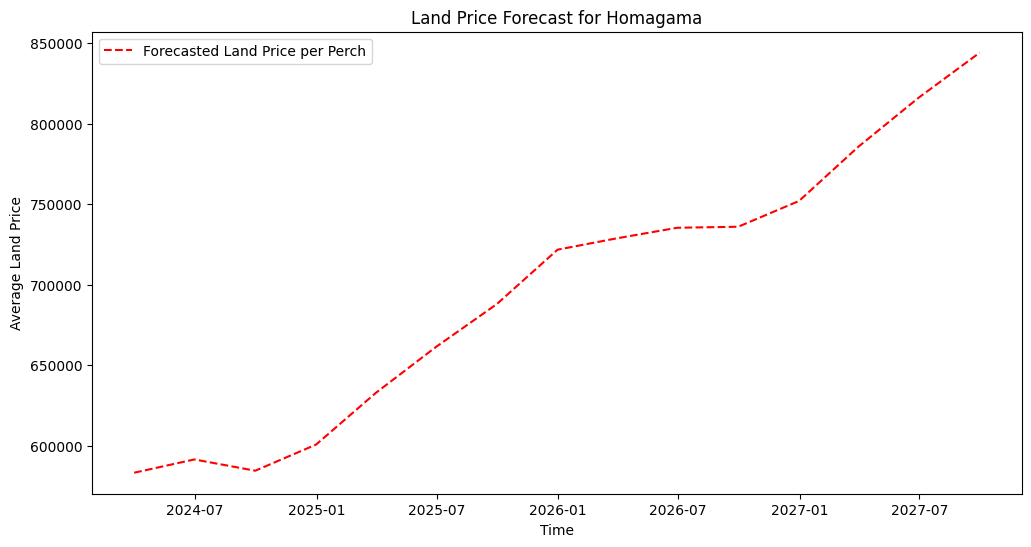

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_df['posted_date'] = pd.to_datetime(time_series_df['posted_date'])

time_series_df['year'] = time_series_df['posted_date'].dt.year
time_series_df['quarter'] = time_series_df['posted_date'].dt.quarter

train_data = time_series_df[time_series_df['posted_date'] < '2023-09-01']

prediction_period = pd.date_range(start='2024-01-01', end='2027-03-31', freq='Q')
prediction_data = pd.DataFrame({'posted_date': prediction_period, 'quarter': prediction_period.quarter})

user_city = input("Enter the main_city: ")

city_df = time_series_df[time_series_df['main_city'] == user_city]

city_df.set_index('posted_date', inplace=True)
quarterly_avg = city_df['price_land_pp'].resample('Q').mean()

train_size = int(len(quarterly_avg) * 0.8)
train, test = quarterly_avg[:train_size], quarterly_avg[train_size:]

order = (1, 1, 1) 
seasonal_order = (1, 1, 1, 8) 
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

forecast_steps = len(test) + 12 
forecast = model_fit.get_forecast(steps=forecast_steps)

end_of_train_index = quarterly_avg.index[-1]

forecast_index = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='Q')

smoothed_forecast = forecast.predicted_mean.rolling(window=5, min_periods=1).mean() 

smoothed_forecast = smoothed_forecast.shift(-2)  

# Plot the smoothed forecasted line
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, smoothed_forecast, color='red', label='Forecasted Land Price per Perch', linestyle='--')

plt.title(f"Land Price Forecast for {user_city}")
plt.xlabel('Time')
plt.ylabel('Average Land Price')
plt.legend()
plt.show()


In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming time_series_df and user_city are already defined

time_series_df['posted_date'] = pd.to_datetime(time_series_df['posted_date'])

time_series_df['year'] = time_series_df['posted_date'].dt.year
time_series_df['quarter'] = time_series_df['posted_date'].dt.quarter

train_data = time_series_df[time_series_df['posted_date'] < '2023-09-01']

prediction_period = pd.date_range(start='2024-01-01', end='2027-03-31', freq='Q')
prediction_data = pd.DataFrame({'posted_date': prediction_period, 'quarter': prediction_period.quarter})

user_city = input("Enter the main_city: ")

city_df = time_series_df[time_series_df['main_city'] == user_city]

city_df.set_index('posted_date', inplace=True)
quarterly_avg = city_df['price_land_pp'].resample('Q').mean()

train_size = int(len(quarterly_avg) * 0.8)
train, test = quarterly_avg[:train_size], quarterly_avg[train_size:]

order = (1, 1, 1) 
seasonal_order = (1, 1, 1, 8) 
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

forecast_steps = len(test) + 12 
forecast = model_fit.get_forecast(steps=forecast_steps)

end_of_train_index = quarterly_avg.index[-1]

forecast_index = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='Q')

smoothed_forecast = forecast.predicted_mean.rolling(window=5, min_periods=1).mean() 
smoothed_forecast = smoothed_forecast.shift(-2)  

# Create a Plotly figure
fig = px.line(x=forecast_index, y=smoothed_forecast, labels={'x': 'Time', 'y': 'Average Land Price'},
              title=f"Land Price Forecast for {user_city}")

fig.update_layout(
    width=1400,
    height=700,
    title=dict(
        text=f"Land Price Forecast for {user_city}",
        x=0.5,  
        y=0.95,  
        xanchor='center',
        #yanchor='top',
        font=dict(size=23), automargin=True
    )
)

fig.update_traces(line=dict(color='red', dash='dash'))

fig.show()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

